# Restauração de imagens por métodos não cegos

## Filtro de Weiner:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.wiener.html

## Filtro Gaussiano:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.gaussian_filter.html

In [2]:
from PIL import Image, ImageOps
from matplotlib.pyplot import *
from matplotlib.image import *
from numpy import *
from scipy import *
from scipy.signal.signaltools import wiener
import os

Função para adicionar ruído (adaptada):

https://stackoverflow.com/questions/22937589/how-to-add-noise-gaussian-salt-and-pepper-etc-to-image-in-python-with-opencv

Parameters
----------
image : ndarray
    Input image data. Will be converted to float.
mode : str
    One of the following strings, selecting the type of noise to add:

    'gauss'     Gaussian-distributed additive noise.
    'poisson'   Poisson-distributed noise generated from the data.
    's&p'       Replaces random pixels with 0 or 1.
    'speckle'   Multiplicative noise using out = image + n*image,where
                n is uniform noise with specified mean & variance.


In [3]:
def noisy(noise_typ,image):

    if noise_typ == "gauss":
       row,col,ch= image.shape
       mean = 0
       var = 0.1
       sigma = var**0.5
       gauss = random.normal(mean,sigma,(row,col,ch))
       gauss = gauss.reshape(row,col,ch)
       noisy = image + gauss
       return noisy

    elif noise_typ == "s&p":
       row,col,ch = image.shape
       s_vs_p = 0.5
       amount = 0.004
       out = copy(image)
       # Salt mode
       num_salt = ceil(amount * image.size * s_vs_p)
       coords = [random.randint(0, i - 1, int(num_salt))
               for i in image.shape]
       out[coords] = 1
 
       # Pepper mode
       num_pepper = ceil(amount* image.size * (1. - s_vs_p))
       coords = [random.randint(0, i - 1, int(num_pepper))
               for i in image.shape]
       out[coords] = 0
       return out

    elif noise_typ == "poisson":
       vals = len(unique(image))
       vals = 2 ** ceil(log2(vals))
       noisy = random.poisson(image * vals) / float(vals)
       return noisy

    elif noise_typ =="speckle":
       row,col,ch = image.shape
       gauss = random.randn(row,col,ch)
       gauss = gauss.reshape(row,col,ch)        
       noisy = image + image * gauss
       return noisy

In [4]:
import cv2

def add_gaussian_noise(X_imgs):
    gaussian_noise_imgs = []
    row, col= X_imgs.shape
    # Gaussian distribution parameters
    mean = 0
    var = 0.1
    sigma = var ** 0.5
    
    for X_img in X_imgs:
        gaussian = random.random((row, col, 1)).astype(float32)
        gaussian = concatenate((gaussian, gaussian, gaussian), axis = 2)
        gaussian_img = cv2.addWeighted(X_img, 0.75, 0.25 * gaussian, 0.25, 0)
        gaussian_noise_imgs.append(gaussian_img)
    gaussian_noise_imgs = array(gaussian_noise_imgs, dtype = np.float32)
    return gaussian_noise_imgs

In [5]:
def rgb2gray(rgb):
    return dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

im_a = asarray(rgb2gray(imread("123_NIKON-D3400-35MM_S.JPG")))
im_b = asarray(Image.open("131_NIKON-D3400-18-55MM_S.JPG"))
im_c = asarray(Image.open("199_CANON-6D-100MM_F.JPG"))

(1365, 2048)

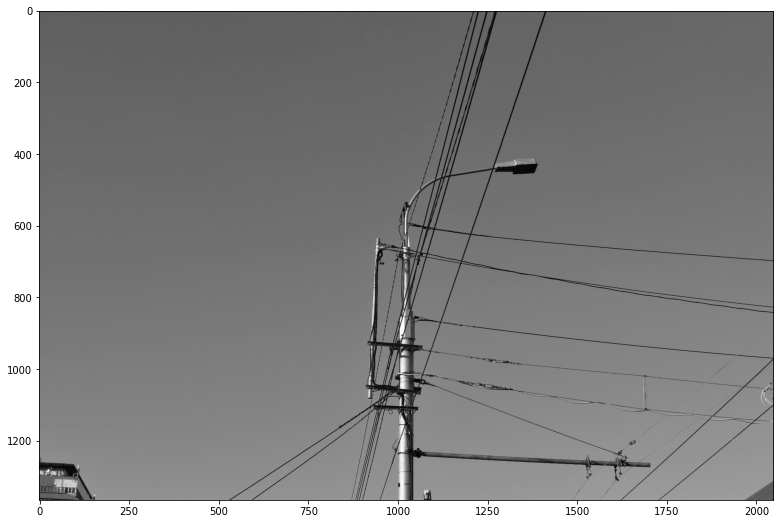

In [6]:
figure(figsize=(16,9))
imshow(im_a, cmap=get_cmap('gray'))
im_a.shape

In [7]:
im2 = add_gaussian_noise(im_a)
imshow(im2)

error: OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-oduouqig\opencv\modules\core\src\arithm.cpp:669: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and the same number of channels), nor 'array op scalar', nor 'scalar op array' in function 'cv::arithm_op'


In [24]:
f_im_a = wiener(im_a)

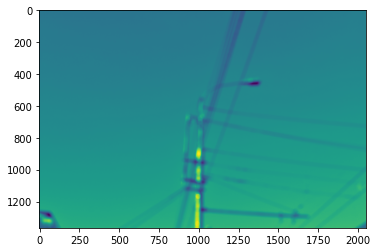

In [31]:
imshow(f_im_a)